- 행정구별 품목별 평균 가격 / 별점 비교 -> 어느 구가 저렴하고 평이 좋은가!


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 

In [3]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
# 콘솔에서 모든 출력 허용하기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
base_data = pd.read_csv('./datas/서울시 착한가격음식점(라벨링).csv', encoding='CP949', index_col=0)
base_data

,업소명,분류코드,분류코드명,업소 주소,업소 전화번호,찾아오시는 길,업소정보,자랑거리,추천수,기준년월,...,경도,행정구,행정동,검색명,식당아이디,별점,상품명,상품가격(일반)(원),메뉴라벨링,외식비
0,목우촌부추삼겹살,1,한식,서울특별시 관악구 남현1길 68-10 (남현동),588-7399,전철 2호선 4호선 사당역에서 5번출구로 나오시면 (구)관악등기소쪽 먹자골목으로 5...,영업시간 : 오전 10시 ~ 오후 11시 30분 좌석수 : 44석 휴무일 : 연중무...,▷사당역 먹자골목에 위치 ▷김치찌개된장찌개 2010년부터 가격 동결 ▷친절업소,257,02월 21일,...,126.981090,관악구,남현동,관악구 남현동 목우촌부추삼겹살,21025096,4.36,냉동삼겹살,8000.0,삼겹살,18056
1,목우촌부추삼겹살,1,한식,서울특별시 관악구 남현1길 68-10 (남현동),588-7399,전철 2호선 4호선 사당역에서 5번출구로 나오시면 (구)관악등기소쪽 먹자골목으로 5...,영업시간 : 오전 10시 ~ 오후 11시 30분 좌석수 : 44석 휴무일 : 연중무...,▷사당역 먹자골목에 위치 ▷김치찌개된장찌개 2010년부터 가격 동결 ▷친절업소,257,02월 21일,...,126.981090,관악구,남현동,관악구 남현동 목우촌부추삼겹살,21025096,4.36,생삼겹살,12000.0,삼겹살,18056
2,돌마리유황오리,1,한식,서울특별시 송파구 가락로 66 (석촌동),423-6231,전철노선 : 8호선 송파역 4번출구에서 강남한의원 방면 도보 7분 버스노선 : 21...,영업시간 :10:00~23:00 예약 :가능 카드 :가능 좌석 :96석 배달 : 불...,친절 서비스,155,02월 21일,...,127.103618,송파구,석촌동,송파구 석촌동 돌마리유황오리,19997949,4.41,삼겹살(국내산/200g),11000.0,삼겹살,18056
3,금강숯불생고기,1,한식,서울특별시 광진구 용마산로7길 9 (중곡동),3437-9599,구 중곡2동사무소 뒤,영업시간 : 11:00~23:00 좌석수 : 40 휴무일 : 무 배달 : 예약 : ...,타 업소에 비해 가격이 저렴함,65,02월 21일,...,127.087090,광진구,중곡동,광진구 중곡동 금강숯불생고기,18800486,4.33,삼겹살,8000.0,삼겹살,18056
4,자매식당,1,한식,서울특별시 광진구 구의로 16 (구의동),3437-8760,구의역 근처 서울광진 우체국 맞은편,영업시간 : 09:00 ~ 21:00 좌석수 : 30 휴무일 : 매주일요일 배달 :...,저렴한 가격,63,02월 21일,...,127.089551,광진구,구의동,광진구 구의동 자매식당,1492791228,4.59,삼겹살,12000.0,삼겹살,18056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,엄마가,1,한식,서울특별시 관악구 신림로 280 1층(신림동),NaN,서원역 1번출구에서 도보 3분,영업시간 : 월~목 11:00~21:00 금 11:00~18:00 일 11:00~2...,ㅇ 관악구 평균가보다 10%이상 저렴 ㅇ 친절하며 집밥 느낌의 메뉴로 구성,0,02월 21일,...,126.931471,관악구,신림동,관악구 신림동 엄마가,1464889020,4.79,김밥,2000.0,김밥,2969
583,먹깨비 김밥,1,한식,서울특별시 서울 강서구 강서로 39,02-2698-0123,NaN,영업시간 : 좌석수 : 휴무일 : 배달 : 예약 : 카드 : 주차 : 홈페이지 주소...,속 꽉차고 담백한 만두 8가지 이상의 재료가 들어간 신선한 김밥 학교 앞에서 먹던 ...,0,02월 21일,...,126.846695,강서구,화곡동,강서구 화곡동 먹깨비 김밥,1012261354,4.32,야채김밥,2000.0,김밥,2969
584,냠냠분식,1,한식,서울특별시 마포구 모래내로7길 89 1층 2호(성산동),NaN,NaN,영업시간 : 좌석수 : 휴무일 : 배달 : 예약 : 카드 : 주차 : 홈페이지 주소...,NaN,0,02월 21일,...,126.908297,마포구,성산동,마포구 성산동 냠냠분식,1027469694,4.24,김밥,2500.0,김밥,2969
585,멸치국수,1,한식,서울특별시 도봉구 해등로16길 12(창동),02-994-8233,창동역 2번출구에서 690m,영업시간 : 10:00-21:00 좌석수 : 휴무일 : 배달 : 불가능 예약 : 카...,도봉구보건소 사거리에 위치하며 가격이 저렴하고 맛이 좋음,0,02월 21일,...,127.040573,도봉구,창동,도봉구 창동 멸치국수,20846748,4.61,김밥,2500.0,김밥,2969


In [6]:
base_data.columns

Index(['업소명', '분류코드', '분류코드명', '업소 주소', '업소 전화번호', '찾아오시는 길', '업소정보', '자랑거리',
       '추천수', '기준년월', '업소 사진', '위도', '경도', '행정구', '행정동', '검색명', '식당아이디', '별점',
       '상품명', '상품가격(일반)(원)', '메뉴라벨링', '외식비'],
      dtype='object')

In [7]:
res_data = base_data[['업소명','행정구', '행정동','별점',
       '상품명', '상품가격(일반)(원)', '메뉴라벨링']]

In [8]:
res_data.head()

,업소명,행정구,행정동,별점,상품명,상품가격(일반)(원),메뉴라벨링
0,목우촌부추삼겹살,관악구,남현동,4.36,냉동삼겹살,8000.0,삼겹살
1,목우촌부추삼겹살,관악구,남현동,4.36,생삼겹살,12000.0,삼겹살
2,돌마리유황오리,송파구,석촌동,4.41,삼겹살(국내산/200g),11000.0,삼겹살
3,금강숯불생고기,광진구,중곡동,4.33,삼겹살,8000.0,삼겹살
4,자매식당,광진구,구의동,4.59,삼겹살,12000.0,삼겹살


In [9]:
# 별점 없는 raw 삭제
star_none = res_data[res_data['별점']=='-'].index
star_none_data = res_data.drop(star_none)
len(star_none_data)

441

In [10]:
star_none_data.head()

,업소명,행정구,행정동,별점,상품명,상품가격(일반)(원),메뉴라벨링
0,목우촌부추삼겹살,관악구,남현동,4.36,냉동삼겹살,8000.0,삼겹살
1,목우촌부추삼겹살,관악구,남현동,4.36,생삼겹살,12000.0,삼겹살
2,돌마리유황오리,송파구,석촌동,4.41,삼겹살(국내산/200g),11000.0,삼겹살
3,금강숯불생고기,광진구,중곡동,4.33,삼겹살,8000.0,삼겹살
4,자매식당,광진구,구의동,4.59,삼겹살,12000.0,삼겹살


In [24]:
star_none_data['별점'] = pd.to_numeric(star_none_data['별점'])

Text(0.5, 1.0, '행정구별 착한가격업소 별점 분포')

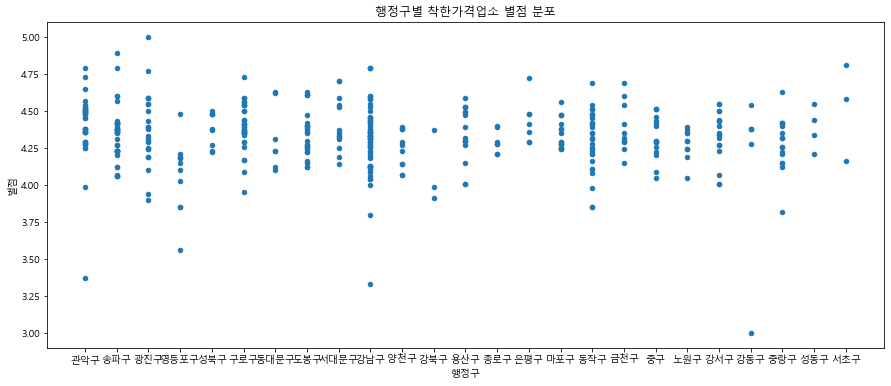

In [25]:
star_none_data.plot(kind='scatter',x='행정구',y='별점',figsize=(15,6))
plt.title('행정구별 착한가격업소 별점 분포')

Text(0.5, 1.0, '행정구별 착한가격업소 상품가격 분포')

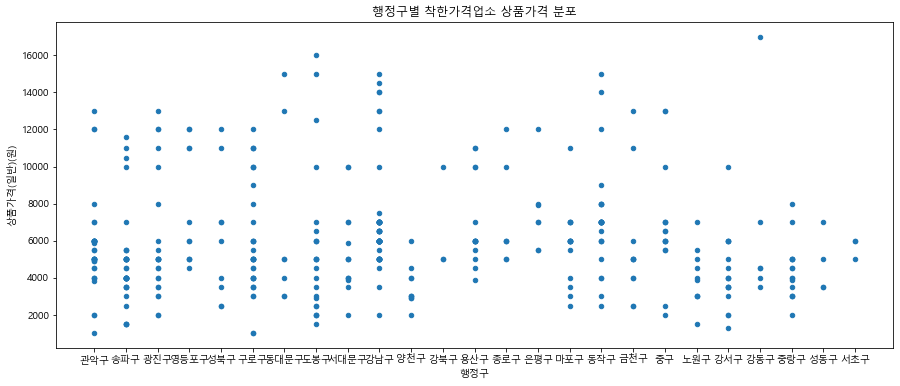

In [27]:
star_none_data.plot(kind='scatter',x='행정구',y='상품가격(일반)(원)',figsize=(15,6))
plt.title('행정구별 착한가격업소 상품가격 분포')

### 각 행정구별 품목별 평균 가격 / 별점 비교

In [32]:
naeng_table = star_none_data[star_none_data['메뉴라벨링']=='냉면']
bi_table = star_none_data[star_none_data['메뉴라벨링']=='비빔밥']
kimchi_table = star_none_data[star_none_data['메뉴라벨링']=='김치찌개백반']
samgyeop_table = star_none_data[star_none_data['메뉴라벨링']=='삼겹살']
ja_table = star_none_data[star_none_data['메뉴라벨링']=='자장면']
samgye_table = star_none_data[star_none_data['메뉴라벨링']=='삼계탕']
kal_table = star_none_data[star_none_data['메뉴라벨링']=='칼국수']
kimbab_table = star_none_data[star_none_data['메뉴라벨링']=='김밥']

In [46]:
len(naeng_table)

68

In [47]:
naeng_table.head()

,업소명,행정구,행정동,별점,상품명,상품가격(일반)(원),메뉴라벨링
103,목우촌부추삼겹살,관악구,남현동,4.36,냉면(물),5000.0,냉면
105,왕세숫대야냉면(행복을파는집),강서구,등촌동,4.44,냉면,3500.0,냉면
106,돌마리유황오리,송파구,석촌동,4.41,물냉면,5000.0,냉면
107,벧엘 칼국수,송파구,마천동,4.12,물냉면,4000.0,냉면
108,흥부농장,광진구,자양동,4.24,냉면,4000.0,냉면


- 각 행정구별 품목별 별점 비교

Text(0.5, 1.0, '각 행정구별 냉면 별점 평균')

(3.0, 5.0)

Text(0.5, 1.0, '각 행정구별 비빔밥 별점 평균')

(3.0, 5.0)

Text(0.5, 1.0, '각 행정구별 김치찌개백반 별점 평균')

(3.0, 5.0)

Text(0.5, 1.0, '각 행정구별 삼겹살 별점 평균')

(3.0, 5.0)

Text(0.5, 1.0, '각 행정구별 자장면 별점 평균')

(3.0, 5.0)

Text(0.5, 1.0, '각 행정구별 칼국수 별점 평균')

(3.0, 5.0)

Text(0.5, 1.0, '각 행정구별 김밥 별점 평균')

(3.0, 5.0)

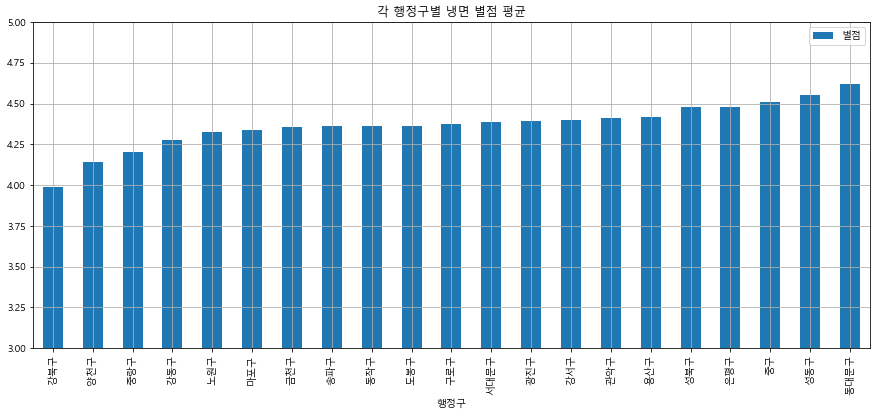

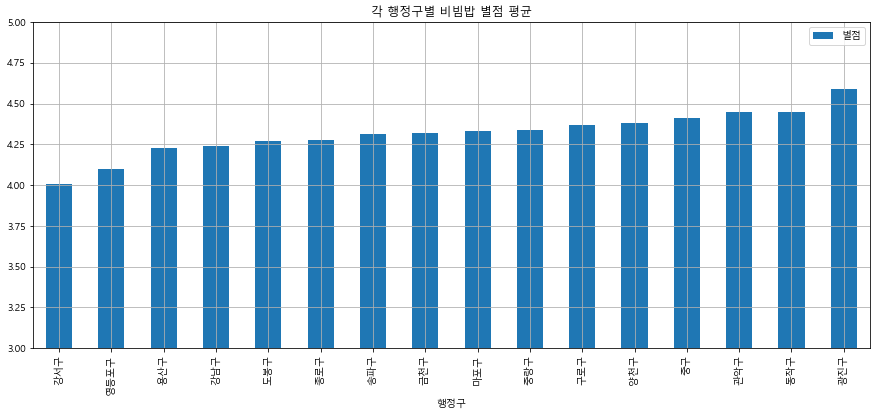

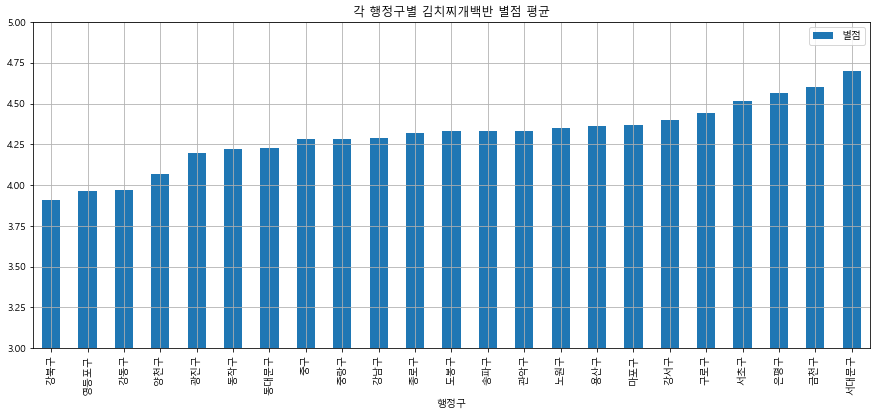

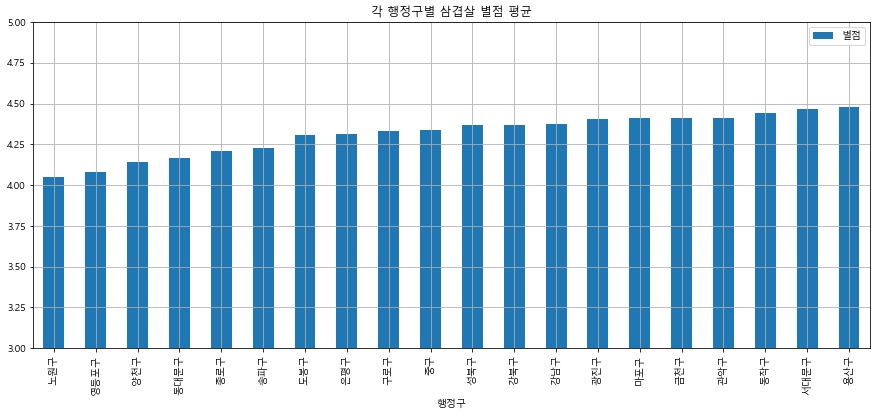

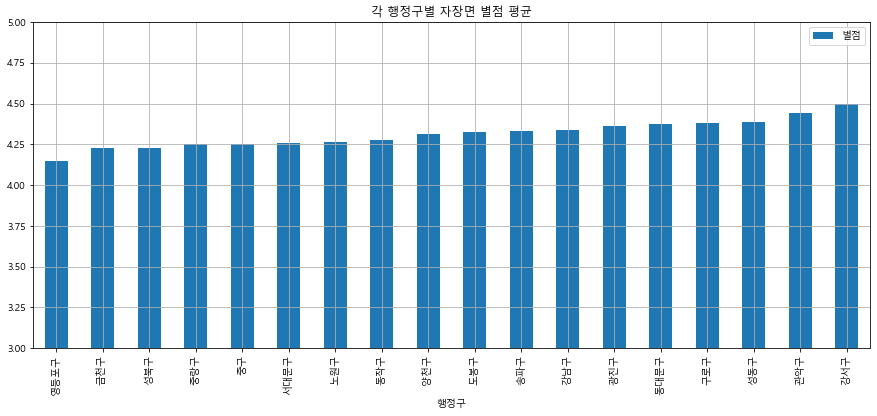

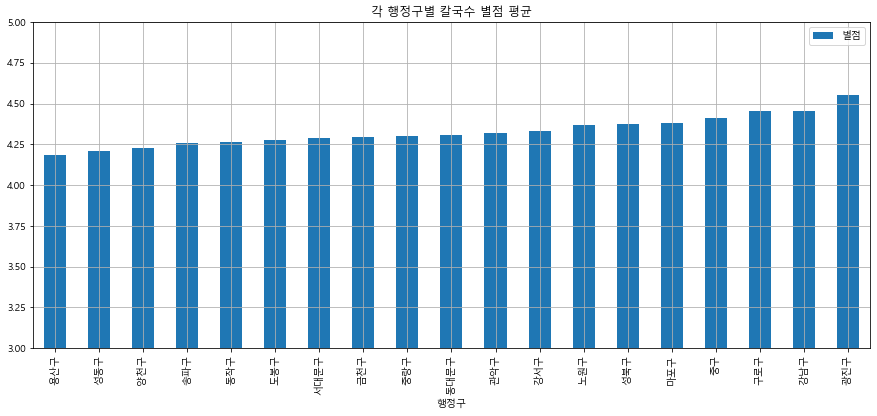

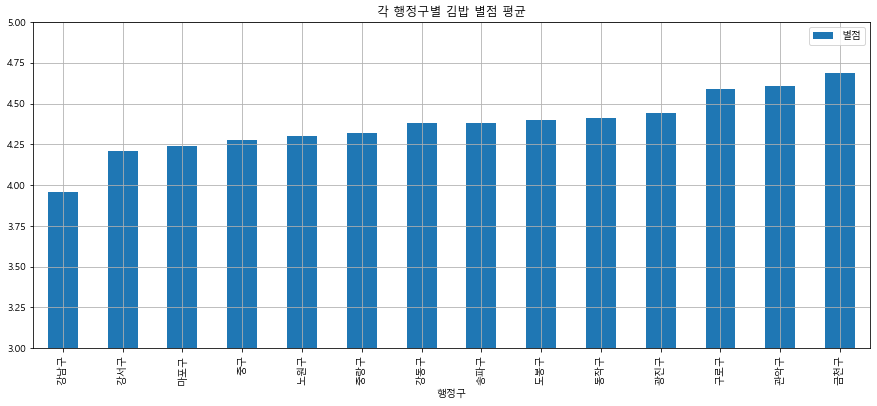

In [36]:
# naeng bi kimchi samgyeop ja samgye kal kimbab
# 냉면
naeng_star_pivot_table = naeng_table.pivot_table("별점",index=["행정구"]).sort_values(by="별점")

naeng_star_pivot_table.plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 냉면 별점 평균')
plt.ylim([3,5])
# 비빔밥
bi_star_pivot_table = bi_table.pivot_table("별점",index=["행정구"]).sort_values(by="별점")

bi_star_pivot_table.plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 비빔밥 별점 평균')
plt.ylim([3,5])
# 김치찌개백반
kimchi_star_pivot_table = kimchi_table.pivot_table("별점",index=["행정구"]).sort_values(by="별점")

kimchi_star_pivot_table.plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 김치찌개백반 별점 평균')
plt.ylim([3,5])
# 삼겹살
samgyeop_star_pivot_table = samgyeop_table.pivot_table("별점",index=["행정구"]).sort_values(by="별점")

samgyeop_star_pivot_table.plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 삼겹살 별점 평균')
plt.ylim([3,5])
# 자장면
ja_star_pivot_table = ja_table.pivot_table("별점",index=["행정구"]).sort_values(by="별점")

ja_star_pivot_table.plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 자장면 별점 평균')
plt.ylim([3,5])
# 칼국수
kal_star_pivot_table = kal_table.pivot_table("별점",index=["행정구"]).sort_values(by="별점")

kal_star_pivot_table.plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 칼국수 별점 평균')
plt.ylim([3,5])
# 김밥
kimbab_star_pivot_table = kimbab_table.pivot_table("별점",index=["행정구"]).sort_values(by="별점")

kimbab_star_pivot_table.plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 김밥 별점 평균')
plt.ylim([3,5])

- 각 행정구별 품목별 가격 평균 비교

Text(0.5, 1.0, '각 행정구별 냉면 가격 평균')

Text(0.5, 1.0, '각 행정구별 비빔밥 가격 평균')

Text(0.5, 1.0, '각 행정구별 김치찌개백반 가격 평균')

Text(0.5, 1.0, '각 행정구별 삼겹살 가격 평균')

Text(0.5, 1.0, '각 행정구별 자장면 가격 평균')

Text(0.5, 1.0, '각 행정구별 칼국수 가격 평균')

Text(0.5, 1.0, '각 행정구별 김밥 가격 평균')

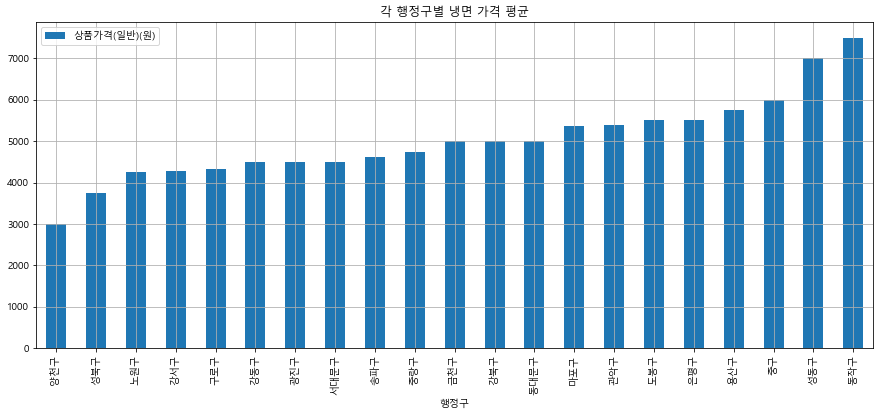

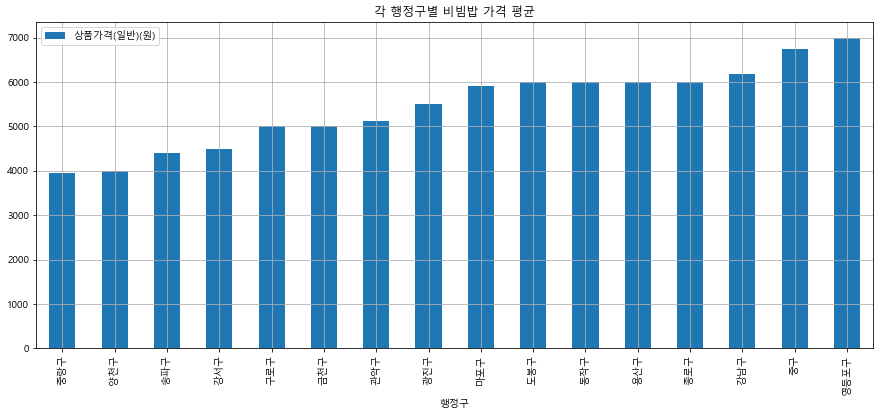

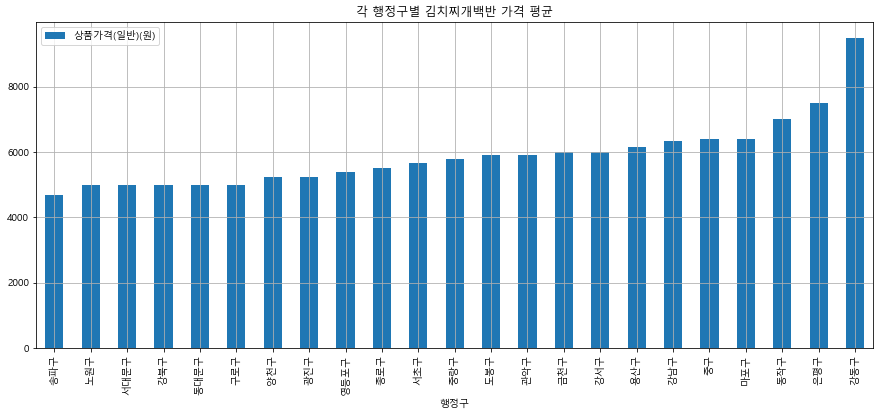

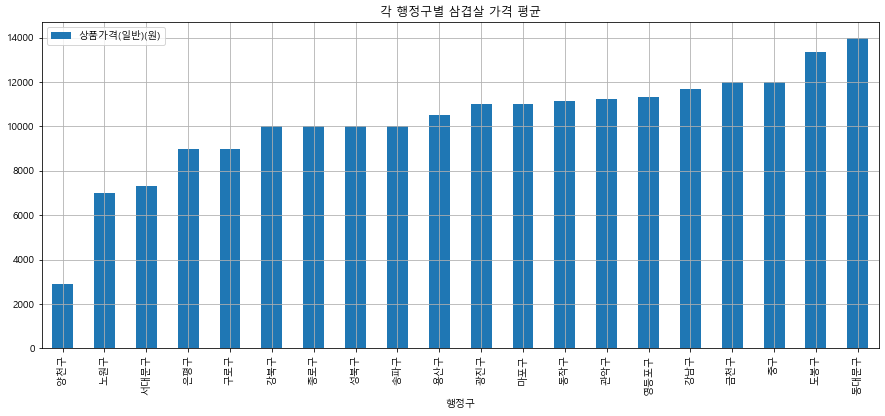

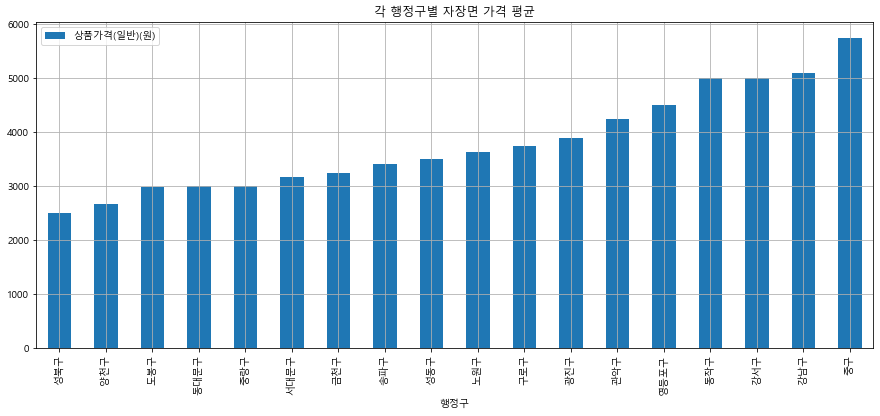

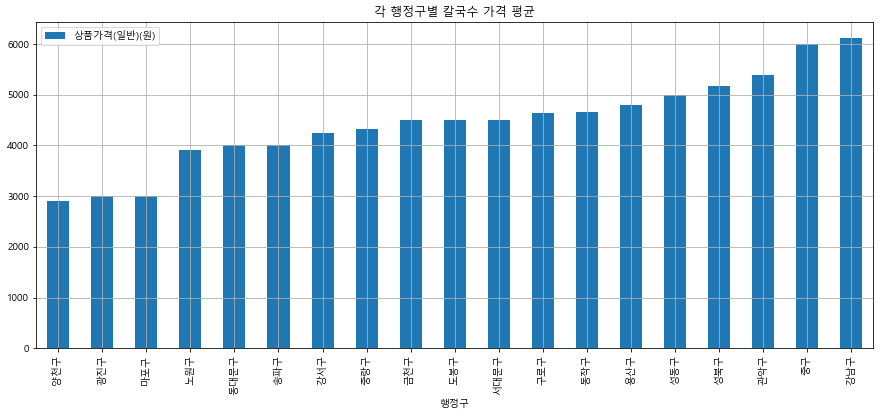

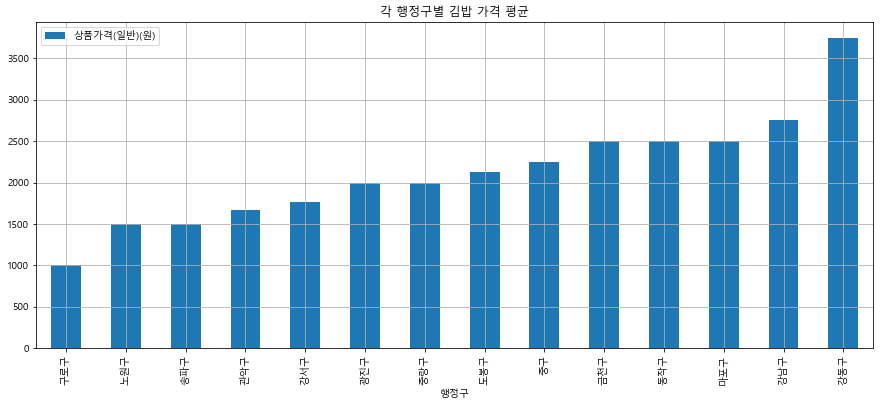

In [37]:
# 냉면
naeng_price_pivot_table = naeng_table.pivot_table("상품가격(일반)(원)",index=["행정구"]).sort_values(by="상품가격(일반)(원)")

naeng_price_pivot_table.plot(kind='bar', grid=True, figsize=(15,6), )
plt.title('각 행정구별 냉면 가격 평균')
# 비빔밥
bi_price_pivot_table = bi_table.pivot_table("상품가격(일반)(원)",index=["행정구"]).sort_values(by="상품가격(일반)(원)")

bi_price_pivot_table.plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 비빔밥 가격 평균')
# 김치찌개백반
kimchi_price_pivot_table = kimchi_table.pivot_table("상품가격(일반)(원)",index=["행정구"]).sort_values(by="상품가격(일반)(원)")

kimchi_price_pivot_table.plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 김치찌개백반 가격 평균')
# 삼겹살
samgyeop_price_pivot_table = samgyeop_table.pivot_table("상품가격(일반)(원)",index=["행정구"]).sort_values(by="상품가격(일반)(원)")

samgyeop_price_pivot_table.plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 삼겹살 가격 평균')
# 자장면
ja_price_pivot_table = ja_table.pivot_table("상품가격(일반)(원)",index=["행정구"]).sort_values(by="상품가격(일반)(원)")

ja_price_pivot_table.plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 자장면 가격 평균')
# 칼국수
kal_price_pivot_table = kal_table.pivot_table("상품가격(일반)(원)",index=["행정구"]).sort_values(by="상품가격(일반)(원)")

kal_price_pivot_table.plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 칼국수 가격 평균')
# 김밥
kimbab_price_pivot_table = kimbab_table.pivot_table("상품가격(일반)(원)",index=["행정구"]).sort_values(by="상품가격(일반)(원)")

kimbab_price_pivot_table.plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 김밥 가격 평균')

#### 별점 테이블

naeng_star_pivot_table
bi_star_pivot_table
kimchi_star_pivot_table
samgyeop_star_pivot_table
ja_star_pivot_table
kal_star_pivot_table
kimbab_star_pivot_table

#### 가격 테이블

naeng_price_pivot_table
bi_price_pivot_table
kimchi_price_pivot_table
samgyeop_price_pivot_table
ja_price_pivot_table
kal_price_pivot_table
kimbab_price_pivot_table

## 어느구가 저렴하고 평이 좋은가!!
- 별점데이터의 평균
- 가격 데이터의 평균을 /1000 하여 보정
- 별점 - 가격 으로 결과 반환

In [61]:
star_pivot_table = star_none_data.pivot_table("별점",index="행정구")
star_pivot_table

,별점
행정구,
강남구,4.311406
강동구,4.160000
강북구,4.090000
강서구,4.333889
관악구,4.399487
광진구,4.375417
구로구,4.397500
금천구,4.380909
노원구,4.278000


In [66]:
price_list = []

In [67]:
price_list = [naeng_price_pivot_table,bi_price_pivot_table,kimchi_price_pivot_table,ja_price_pivot_table,kal_price_pivot_table]
price_list

[      상품가격(일반)(원)
 행정구              
 양천구   3000.000000
 성북구   3750.000000
 노원구   4250.000000
 강서구   4285.714286
 구로구   4333.333333
 강동구   4500.000000
 광진구   4500.000000
 서대문구  4500.000000
 송파구   4615.384615
 중랑구   4750.000000
 금천구   5000.000000
 강북구   5000.000000
 동대문구  5000.000000
 마포구   5375.000000
 관악구   5380.000000
 도봉구   5500.000000
 은평구   5500.000000
 용산구   5750.000000
 중구    6000.000000
 성동구   7000.000000
 동작구   7500.000000,
       상품가격(일반)(원)
 행정구              
 중랑구   3950.000000
 양천구   4000.000000
 송파구   4400.000000
 강서구   4500.000000
 구로구   5000.000000
 금천구   5000.000000
 관악구   5112.500000
 광진구   5500.000000
 마포구   5900.000000
 도봉구   6000.000000
 동작구   6000.000000
 용산구   6000.000000
 종로구   6000.000000
 강남구   6181.818182
 중구    6750.000000
 영등포구  7000.000000,
       상품가격(일반)(원)
 행정구              
 송파구   4700.000000
 노원구   5000.000000
 서대문구  5000.000000
 강북구   5000.000000
 동대문구  5000.000000
 구로구   5000.000000
 양천구   5250.000000
 광진구   5250.000000
 영등포구  5400.000000
 종로구   550

In [68]:
price_pivot_table = pd.concat(price_list)
price_pivot_table

,상품가격(일반)(원)
행정구,
양천구,3000.000000
성북구,3750.000000
노원구,4250.000000
강서구,4285.714286
구로구,4333.333333
...,...
성동구,5000.000000
성북구,5166.666667
관악구,5380.000000


In [70]:
# 삼겹살, 김밥 있고 없고의 차이가 커서 같아서 제외하고 평균
price_pivot_table = price_pivot_table.pivot_table("상품가격(일반)(원)",index="행정구")

In [71]:
price_pivot_table

,상품가격(일반)(원)
행정구,
강남구,5938.243007
강동구,7000.000000
강북구,5000.000000
강서구,4807.142857
관악구,5207.357143
광진구,4430.000000
구로구,4545.238095
금천구,4750.000000
노원구,4193.750000


In [74]:
price_pivot_table["상품가격(일반)(원)"] = price_pivot_table["상품가격(일반)(원)"] / 1000

In [75]:
print(len(star_pivot_table))
print(len(price_pivot_table))

25
25


In [77]:
star_pivot_table.sort_index()
price_pivot_table.sort_index()

,별점
행정구,
강남구,4.311406
강동구,4.160000
강북구,4.090000
강서구,4.333889
관악구,4.399487
광진구,4.375417
구로구,4.397500
금천구,4.380909
노원구,4.278000


,상품가격(일반)(원)
행정구,
강남구,5.938243
강동구,7.000000
강북구,5.000000
강서구,4.807143
관악구,5.207357
광진구,4.430000
구로구,4.545238
금천구,4.750000
노원구,4.193750


In [78]:
result_table = star_pivot_table
result_table['가격/1000'] = price_pivot_table['상품가격(일반)(원)']
result_table.head()

,별점,가격/1000
행정구,,
강남구,4.311406,5.938243
강동구,4.160000,7.000000
강북구,4.090000,5.000000
강서구,4.333889,4.807143
관악구,4.399487,5.207357


In [93]:
# 별점 - 가격의 값이 음수라 +3 으로 양수로 보정
result_table['점수'] = result_table['별점'] - result_table['가격/1000'] + 3 
result_table

,별점,가격/1000,점수
행정구,,,
강동구,4.160000,7.000000,0.160000
은평구,4.432857,6.500000,0.932857
중구,4.326875,6.180000,1.146875
동작구,4.292500,6.033333,1.259167
강남구,4.311406,5.938243,1.373163
영등포구,4.070909,5.633333,1.437576
종로구,4.294286,5.750000,1.544286
용산구,4.355000,5.679167,1.675833
서초구,4.516667,5.666667,1.850000


In [94]:
result_table.sort_values('점수', inplace=True)

Text(0.5, 1.0, '각 행정구별 가성비 맛집 순위')

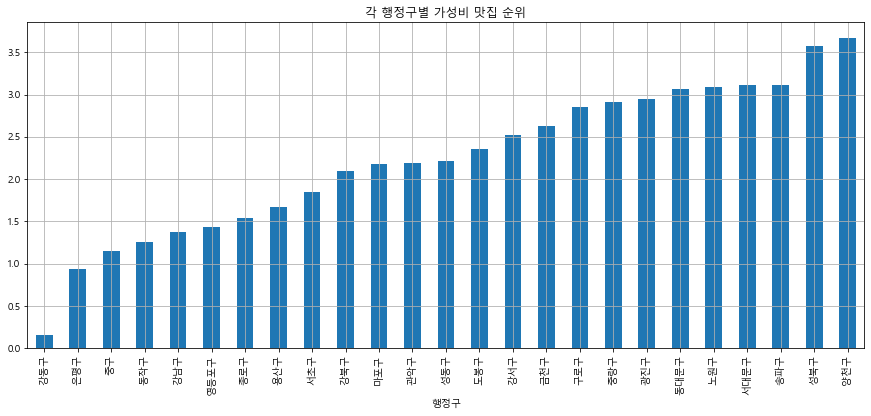

In [95]:
result_table['점수'].plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 가성비 맛집 순위')

Text(0.5, 1.0, '각 행정구별 가성비 맛집 순위')

(-3.0, 1.0)

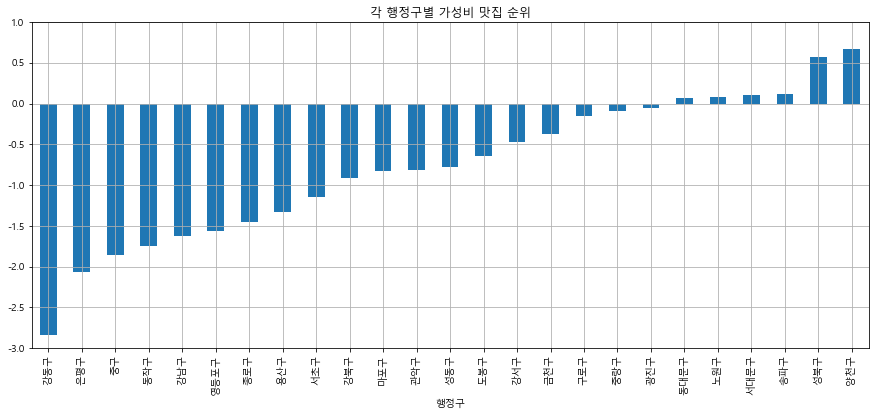

In [87]:
result_table['점수'].plot(kind='bar', grid=True, figsize=(15,6))
plt.title('각 행정구별 가성비 맛집 순위')
plt.ylim(-3,1)